# **IMPORTING REQUIRED MODULES**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from nltk.corpus import stopwords 
from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
import random
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READING DATA FROM CSV FILE**

In [ ]:
random.seed(4321)
data = pd.read_csv("/content/drive/MyDrive/ML_AP/sqliv2.csv", encoding='utf-16',
           skiprows=lambda x: x > 0 and random.random() >=0.50)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  16886 non-null  object
 1   Label     16890 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 264.0+ KB


In [ ]:
data.groupby('Label').size()

Label
0    11201
1     5689
dtype: int64

In [ ]:
data

,Sentence,Label
0,NaN,1
1,""" or pg_sleep ( __TIME__ ) --",1
2,create user name identified by pass123 tempora...,1
3,%29,1
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1
...,...,...
16885,tortolito,0
16886,41,0
16887,syrett,0
16888,arrechea bellveh,0


# **DATA PREPROCESSING**

Word Count with CountVectorizer
1. crerate an instance of the CountVectorizer class.
2. call the fit() function in order to learn a vocabulary from one or more documents.
3. call the transform() function on one more document as needed to encode each as a vector.

In [ ]:
#create the transform
vectorizer = CountVectorizer(min_df=2, max_df=0.7, stop_words=stopwords.words('english')) 
# tokenize(fit) and build vocab 
vectorizer.fit(data['Sentence'].values.astype('U')) # .astype('U') -> convert to Unicode   
print(vectorizer.vocabulary_) 
#encode document(transform)
vector= vectorizer.transform(data['Sentence'].values.astype('U'))
posts= vector.toarray()

{'nan': 3723, 'pg_sleep': 4008, '__time__': 1458, 'create': 2292, 'user': 5058, 'name': 3721, 'identified': 3107, 'temp': 4858, 'users': 5061, '29': 426, 'utl_inaddr': 5069, 'get_host_address': 2898, 'select': 4535, 'distinct': 2457, 'table_name': 4818, 'rownum': 4430, 'limit': 3424, 'sys': 4796, 'all_tables': 1568, 'id': 3104, 'union': 5036, 'version': 5110, 'sysobjects': 4806, 'load_file': 3442, 'char': 2057, '47': 681, '101': 21, '116': 63, '99': 1444, '112': 55, '97': 1422, '115': 61, '119': 72, '100': 16, 'column_name': 2160, 'all_tab_columns': 1567, 'admin': 1499, 'insert': 3168, '26': 387, '27': 397, 'null': 3796, 'banner': 1761, 'sa': 4452, 'waitfor': 5164, 'delay': 2390, '4039': 582, '41': 590, 'declare': 2374, 'varchar': 5090, '200': 289, 'benchmark': 1808, '10000000': 18, 'md5': 3578, 'sleep': 4621, '50': 731, 'substring': 4755, '24': 361, 'username': 5060, 'all_users': 1569, '2a': 437, '28': 412, '7c': 1159, '3d': 573, '25': 371, 'immediate': 3117, 'sel': 4534, 'ect': 2523,

max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

    max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    max_df = 25 means "ignore terms that appear in more than 25 documents"
    
min_df is used for removing terms that appear too infrequently. For example:

    min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    min_df = 5 means "ignore terms that appear in less than 5 documents".


In [ ]:
print(vector.shape)
print(type(vector))
print(posts) #print the encoded vectors

(16890, 5289)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


we have 16890 vectors (samples) and each one has 5289 words (features) (each word will be represented by 0 or 1)

In [ ]:
transformed_posts=pd.DataFrame(posts)
df=pd.concat([data,transformed_posts],axis=1)
X=df[df.columns[2:]]
y=df['Label']

In [ ]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,""" or pg_sleep ( __TIME__ ) --",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,create user name identified by pass123 tempora...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,%29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,' AND 1 = utl_inaddr.get_host_address ( ( S...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 13418 to 8773
Columns: 5289 entries, 0 to 5288
dtypes: int64(5289)
memory usage: 136.3 MB


# **ML ALGORITHMS**

# **1) LOGISTIC REGRESSION**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log_reg=log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)
print(y_pred_log_reg)

[0 0 1 ... 0 1 0]


In [ ]:
for i in range(0,50):
    print(y_pred_log_reg[i])

0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


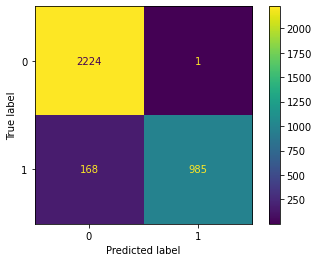

 Accuracy : 0.9499703966844286 
 Precision : 0.9989858012170385 
 Recall : 0.8542931483087598


In [ ]:
confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_log_reg)
precision=precision_score(y_test, y_pred_log_reg, zero_division=1)
recall=recall_score(y_test, y_pred_log_reg, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

# **2) SUPPORT VECTOR MACHINE**
Linear SVM:

In [ ]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
y_pred_svm=svm_clf.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.9496743635287153

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


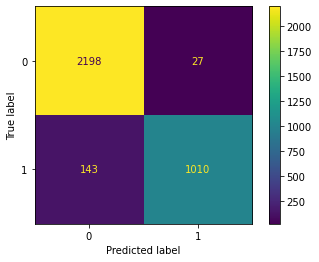

 Accuracy : 0.9496743635287153 
 Precision : 0.973963355834137 
 Recall : 0.8759757155247181


In [ ]:
confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_svm)
precision=precision_score(y_test, y_pred_svm, zero_division=1)
recall=recall_score(y_test, y_pred_svm, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

# **3) DECISION TREE**

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tree=tree_clf.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.9487862640615748

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


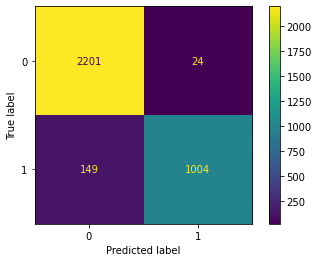

 Accuracy : 0.9487862640615748 
 Precision : 0.9766536964980544 
 Recall : 0.8707718993928881


In [ ]:
confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(tree_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_tree)
precision=precision_score(y_test, y_pred_tree, zero_division=1)
recall=recall_score(y_test, y_pred_tree, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

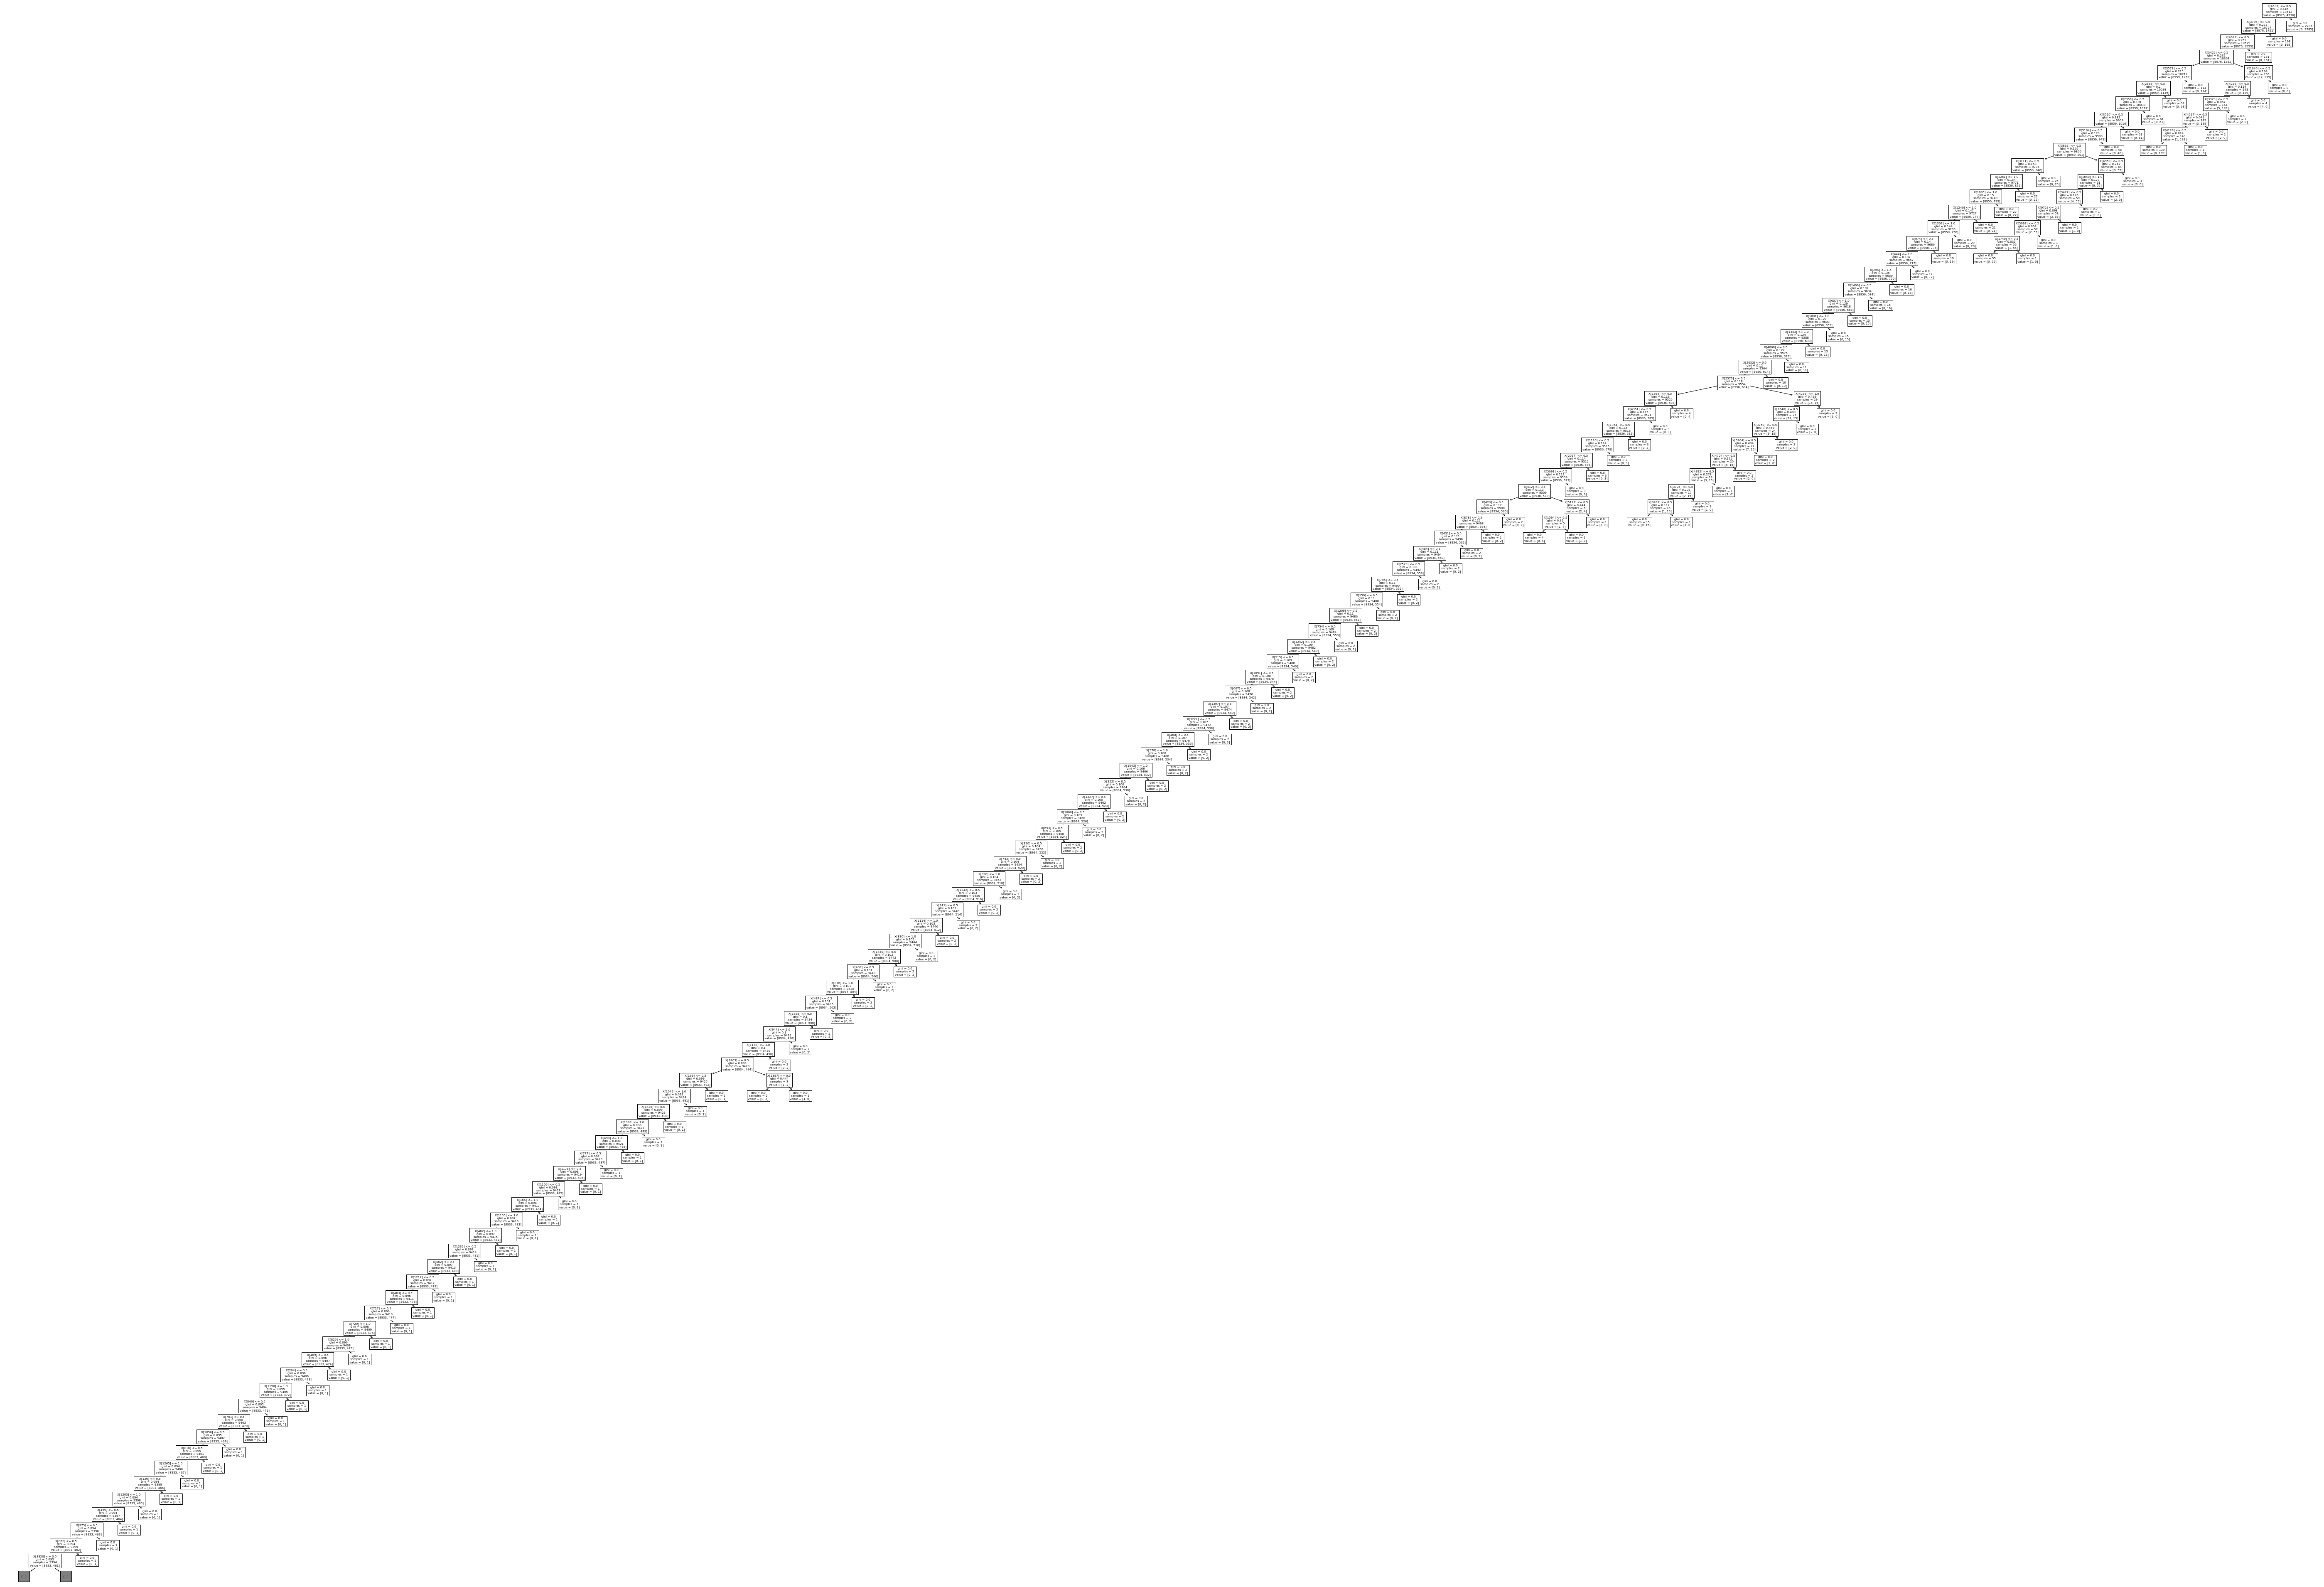

In [ ]:
width = 100
height = 70
plt.figure(figsize=(width, height))

tree_plot_max_depth = 100
tree.plot_tree(tree_clf, max_depth=tree_plot_max_depth)

## the key to the problem of not showing tree is the command below
plt.show()

In [ ]:
dot_data = export_graphviz(
 tree_clf,
 out_file=None,
 max_depth = 35,
 rounded=True,
 filled=True,
 special_characters=True
 )

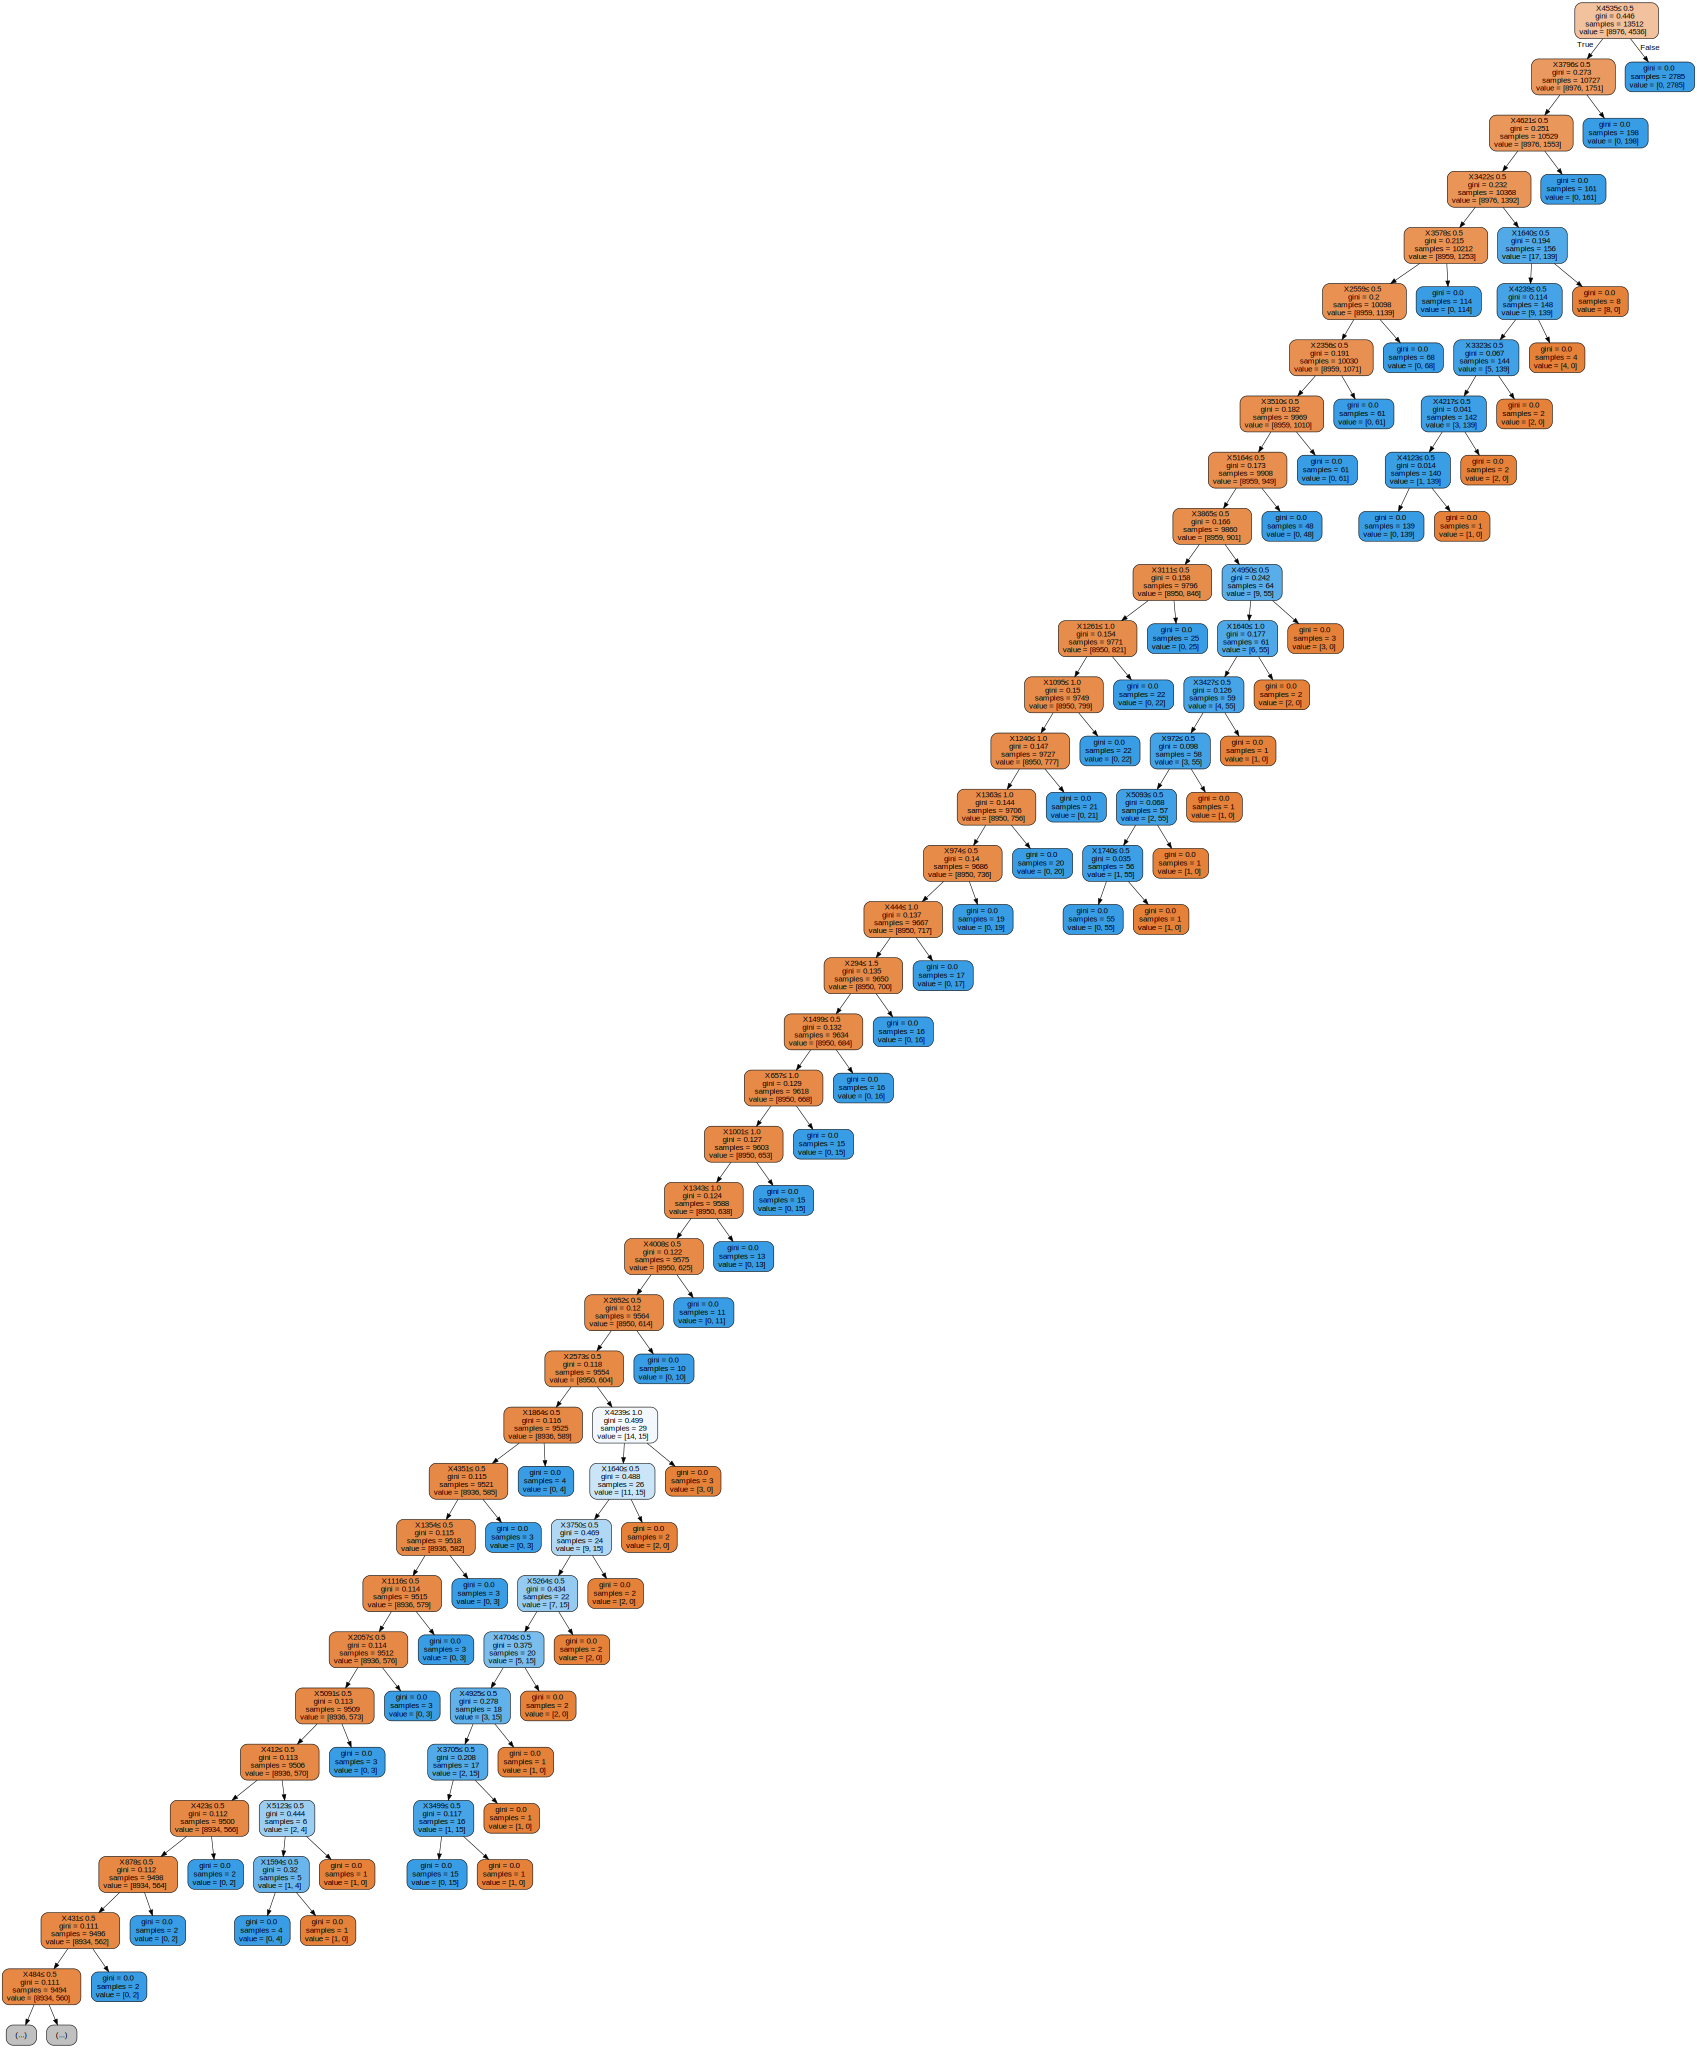

In [ ]:
graph = graphviz.Source(dot_data)
graph

# **4) RANDOM FOREST**

# Applying grid search for hyperparameter estimation

In [ ]:
print(__doc__)
# build a classifier
bag_clf = RandomForestClassifier()
# specify parameters and distributions to sample from
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]


# run grid search
grid_search = GridSearchCV(bag_clf, param_grid=param_grid, cv=5, scoring= 'recall')
start = time()
grid_search.fit(X_train, y_train)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
grid_search.cv_results_

Automatically created module for IPython interactive environment
GridSearchCV took 213.51 seconds for 18 candidate parameter settings.


{'mean_fit_time': array([0.66038036, 1.55785499, 4.17279296, 0.67388234, 1.63986526,
        4.39471302, 0.6998528 , 1.72759795, 4.61628542, 0.71682444,
        1.79841609, 4.85472121, 0.90622954, 2.40469556, 0.94220266,
        2.50254107, 0.94379573, 2.57056408]),
 'std_fit_time': array([0.02428149, 0.00938979, 0.03446046, 0.01197349, 0.01039386,
        0.02883421, 0.0101081 , 0.01096735, 0.0340785 , 0.0067594 ,
        0.03040889, 0.0235242 , 0.00790977, 0.03779807, 0.01691404,
        0.02969167, 0.00934389, 0.0484908 ]),
 'mean_score_time': array([0.11999955, 0.21604929, 0.50745463, 0.10548043, 0.20250249,
        0.4695034 , 0.10396476, 0.19167886, 0.44254894, 0.10593414,
        0.18839316, 0.43765445, 0.1243042 , 0.2559391 , 0.1224504 ,
        0.24927011, 0.11792302, 0.24004269]),
 'std_score_time': array([0.00659736, 0.00718395, 0.01257283, 0.00310895, 0.00386376,
        0.01497484, 0.00362228, 0.00428449, 0.01184965, 0.00328808,
        0.00402135, 0.00353981, 0.00182113, 

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=4, n_estimators=10)

In [ ]:
bag_clf = RandomForestClassifier(n_estimators=3, max_features= 3, bootstrap= False)
bag_clf.fit(X_train, y_train)
y_pred_random = bag_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


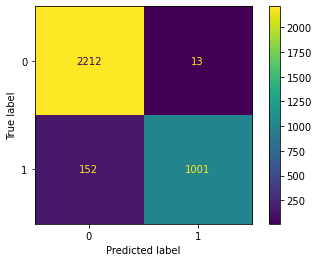

 Accuracy : 0.9511545293072824 
 Precision : 0.9871794871794872 
 Recall : 0.8681699913269731


In [ ]:
confusion_matrix(y_test, y_pred_random)
plot_confusion_matrix(bag_clf, X_test, y_test)  
plt.show()
accuracy=accuracy_score(y_test, y_pred_random)
precision=precision_score(y_test, y_pred_random, zero_division=1)
recall=recall_score(y_test, y_pred_random, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

# **SAVING THE MODEL**

In [ ]:
# Save the model as a pickle in a file 
joblib.dump(bag_clf, 'RandomForest.pkl') 
with open('myVectorizer', 'wb') as file:
    pickle.dump(vectorizer, file)

# **PREDICTING OUTPUT FOR USER INPUT**

In [ ]:
# Load the model from the file 
randomForest_from_joblib = joblib.load('RandomForest.pkl')  
myvectorizer = pickle.load(open("myVectorizer", 'rb')) 

def clean(input_val):

    input_val=input_val.replace('\n', '')
    input_val=input_val.replace('%20', ' ')
    input_val=input_val.replace('=', ' = ')
    input_val=input_val.replace('((', ' (( ')
    input_val=input_val.replace('))', ' )) ')
    input_val=input_val.replace('(', ' ( ')
    input_val=input_val.replace(')', ' ) ')

    return input_val

def is_sqli_attack(input_val):

    input_val=clean(input_val)
    input_val=[input_val]

    input_val=myvectorizer.transform(input_val).toarray()
    result=randomForest_from_joblib.predict(input_val)

    if result==1:
      print("ALERT! This could be SQL injection attack!")
      return "ALERT! This could be SQL injection attack!"
    elif result==0:
      print("It seems to be a benign")
      return "It seems to be a benign"

In [ ]:
!pip install pyngrok==4.1.1
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15983 sha256=b430b0f37cb2958d936e1882eb2ed1714b1e217b7fd2be255fac984d82eedc17
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ngrok authtoken 2HAhJP01Qm3R4XaAbf6gNbtRNtq_GuyBwGMDsedKzhUeyYyu
# importing Flask and other modules
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok
 
# Flask constructor
app = Flask(__name__, template_folder='/content/drive/MyDrive/ML_AP/templates')  
run_with_ngrok(app)

# A decorator used to tell the application
# which URL is associated function
@app.route('/', methods =["GET", "POST"])
def gfg():
    if request.method == "POST":
       # getting input with name = fname in HTML form
       query = request.form.get("query")
       result = is_sqli_attack(query)
       return result
    return render_template("form.html")
 
if __name__=='__main__':
   app.run()

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9f05-34-125-222-102.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [07/Nov/2022 09:18:46] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2022 09:18:47] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2022 09:19:18] "POST / HTTP/1.1" 200 -


ALERT! This could be SQL injection attack!


INFO:werkzeug:127.0.0.1 - - [07/Nov/2022 09:19:21] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [07/Nov/2022 09:19:31] "POST / HTTP/1.1" 200 -


It seems to be a benign
